## Reading the results of the Behavioral Complexity study

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Plot the mean and standard error for test performance metrics as a function of age. Confirm the paper's finding.

In [3]:
df = pd.read_csv('lifespan.csv', sep=' ')
task = 'toss.K'
df.dropna(how='any', inplace=True)
x, y = np.array(df['age']), np.array(df[task])

# sort by x
x, idx = np.unique(x, return_index=True)
y = y[idx]

In [4]:
# predictors
def get_predictors(x, period=80.0):
    return np.stack((
        np.ones(x.size),
        np.sin(1*2*np.pi*x/period),
        np.cos(1*2*np.pi*x/period),
        np.sin(2*2*np.pi*x/period),
        np.cos(2*2*np.pi*x/period),
    ))

Best age: 28.9


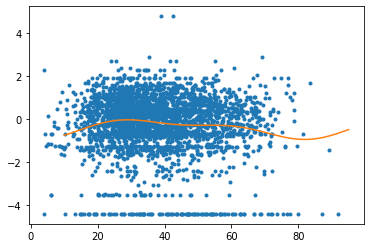

In [6]:
X = get_predictors(x)
fit = y @ X.T @ np.linalg.inv(X @ X.T)
yhat = fit @ X
plt.plot(x, y, '.')

t = np.linspace(10, 95, 100)
Xt = get_predictors(t)
yt = fit @ Xt
plt.plot(t, yt)

best_age = t[yt.max() == yt][0]
print(f'Best age: {best_age:0.1f}')

# Bootstap: Resampling from the data 

Best age: 27.9


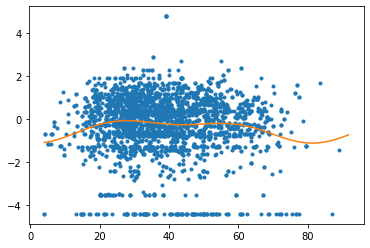

In [7]:
ix = np.random.randint(0, x.size, x.size)  # resampling indices
xx = x[ix]
yy = y[ix]

X = get_predictors(xx)
t = np.linspace(x.min(), x.max(), 100)
Xt = get_predictors(t)

fit = yy @ X.T @ np.linalg.inv(X @ X.T)

plt.plot(xx, yy, '.')
yt = fit @ Xt
plt.plot(t, yt)

best_age = t[yt.max() == yt][0]
print(f'Best age: {best_age:0.1f}')

Text(0.5, 0, 'age')

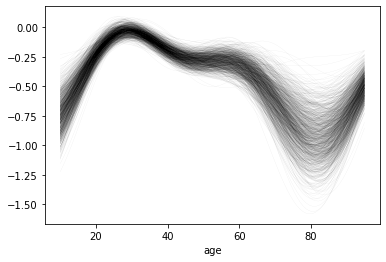

In [8]:
# repeat resampling many times (plotting only)

for i in range(1000):
    ix = np.random.randint(0, x.size, x.size)
    xx = x[ix]
    yy = y[ix]

    X = get_predictors(xx)
    t = np.linspace(10, 95, 100)
    Xt = get_predictors(t)

    fit = yy @ X.T @ np.linalg.inv(X @ X.T)

    yt = fit @ Xt
    plt.plot(t, yt, 'k', alpha=0.1, lw=0.2)

plt.xlabel('age')

# Compute confidence intervals by resampling 

In [9]:
# repeat resampling many times to find lower and upper confidence intervals

yt = []
age = []
for i in range(1000):
    ix = np.random.randint(0, x.size, x.size)
    xx = x[ix]
    yy = y[ix]

    X = get_predictors(xx)
    t = np.linspace(x.min(), x.max(), 100)
    Xt = get_predictors(t)

    fit = yy @ X.T @ np.linalg.inv(X @ X.T)
    yhatt = fit @ Xt
    yt.append(yhatt)
    age.append(t[yhatt==yhatt.max()])

age = np.array(age)
yt = np.stack(yt)
lower, upper = np.percentile(yt, [2.5, 97.5], axis=0)

In [ ]:
plt.plot(x, y, '.', ms=1)
plt.fill_between(t, lower, upper, color='k', alpha=0.3)
plt.plot(x, yhat, color='k', lw=2)
ixmax = (yhat == yhat.max())
plt.plot([x[ixmax]]*2, [y.min(), y.max()], lw=3, alpha=.5, color='red')
plt.plot([np.percentile(age, 2.5)]*2, [y.min(), y.max()], lw=1, alpha=.5, color='red')
plt.plot([np.percentile(age, 97.5)]*2, [y.min(), y.max()], lw=1, alpha=.5, color='red')

# Binary classifier

In [ ]:
x, y

In [ ]:
group = (x > 15) * (x < 60)

In [ ]:
group.mean()

In [ ]:
group.mean()

In [ ]:
plt.plot(y, group, '.')
plt.xlabel('performance')

In [ ]:
plt.hist(y[group], 100)
plt.hist(y[~group], 100)
plt.legend(('In', 'Out'))

In [ ]:
TPR = []
FPR = []
yrange = y.max() - y.min()
for threshold in np.linspace(y.min() - yrange *.1, y.max() + yrange*.1, 100):
    pred = y >= threshold
    TPR.append((pred * group).sum() / group.sum())
    FPR.append(((pred) * (~group)).sum() / (~group).sum())

In [ ]:
FPR = np.array(FPR)
TPR = np.array(TPR)
plt.plot(FPR, TPR, '.')
plt.plot([0, 1], [0, 1], 'k', alpha=0.5, lw=0.5)
plt.axis('square')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC');

AUC = np.sum(((TPR - FPR)[:-1] + (TPR - FPR)[1:])/2 * (FPR[:-1] - FPR[1:]))
print(f'AUC: {AUC:0.2}')